# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## Load The Data

In [2]:
batch_data = pd.read_csv('./data/batch_data_clean.csv')
recipe_data = pd.read_csv('./data/recipe_data_clean.csv')

In [3]:
print(batch_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rcp_id                 1123 non-null   int64  
 1   base_malt_pct          1122 non-null   float64
 2   Boil Kettle            834 non-null    float64
 3   Whirlpool              834 non-null    float64
 4   Fermenter              834 non-null    float64
 5   Total Hops             834 non-null    float64
 6   fermenter_temperature  1106 non-null   float64
 7   cu_low                 1068 non-null   float64
 8   cu_high                1102 non-null   float64
 9   cu_setpoint            1115 non-null   float64
 10  pre_run_dump_volume    557 non-null    float64
 11  original_gravity       1123 non-null   float64
 12  clar_eff               1123 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 114.2 KB
None


In [4]:
print(recipe_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rcp_id                 270 non-null    int64  
 1   base_malt_pct          269 non-null    float64
 2   Boil Kettle            99 non-null     float64
 3   Whirlpool              99 non-null     float64
 4   Fermenter              99 non-null     float64
 5   Total Hops             99 non-null     float64
 6   fermenter_temperature  267 non-null    float64
 7   cu_low                 260 non-null    float64
 8   cu_high                263 non-null    float64
 9   cu_setpoint            264 non-null    float64
 10  pre_run_dump_volume    156 non-null    float64
 11  original_gravity       270 non-null    float64
 12  clar_eff               270 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 27.5 KB
None


## Explore The Data

### Visualizing High Dimensional Data

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### Scale the data

You only want numeric data here, although you don't want to lose track of the state labels, so it's convenient to set the state as the index.

The above shows what we expect: the columns we want are all numeric and the state has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [5]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
recipe_data_scale = recipe_data.dropna().set_index('rcp_id')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
recipe_data_index = recipe_data_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
recipe_data_columns = recipe_data_scale.columns
recipe_data_scale.head()

,base_malt_pct,Boil Kettle,Whirlpool,Fermenter,Total Hops,fermenter_temperature,cu_low,cu_high,cu_setpoint,pre_run_dump_volume,original_gravity,clar_eff
rcp_id,,,,,,,,,,,,
75,81.935483,11.548269,0.915385,2.369231,14.832885,34.160000,0.154667,0.439333,0.655000,1.480000,15.804333,84.580859
76,73.452258,6.742129,0.179722,1.198148,8.120000,34.433333,0.257778,0.491111,0.661111,1.050000,10.476667,93.025291
87,67.502022,2.832110,0.478899,0.582569,3.893578,33.528868,0.185625,0.371538,0.523585,12.051613,13.267925,89.347707
92,69.630420,2.694340,0.160377,0.000000,2.854717,33.009091,0.562727,0.893636,1.100000,9.466667,18.088182,90.559659
94,75.396824,3.212963,0.648148,0.000000,3.861111,34.491666,0.225833,0.485000,0.641667,0.716667,13.205000,94.153815


In [6]:
recipe_data_scale = scale(recipe_data.dropna())

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualise scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [7]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
recipe_scaled_df = pd.DataFrame(recipe_data_scale, columns=recipe_data.columns)
recipe_scaled_df.head()

,rcp_id,base_malt_pct,Boil Kettle,Whirlpool,Fermenter,Total Hops,fermenter_temperature,cu_low,cu_high,cu_setpoint,pre_run_dump_volume,original_gravity,clar_eff
0,-1.927741,1.021688,1.156883,0.649215,1.587739,1.331013,0.639430,-0.653372,-0.216086,-0.153918,-0.361724,0.455411,-0.777975
1,-1.918411,0.394850,0.392668,-0.433453,0.377825,0.365444,0.790100,-0.141190,-0.086091,-0.136785,-0.493998,-1.294655,0.742055
2,-1.815787,-0.044822,-0.229056,0.006843,-0.258167,-0.242477,0.291529,-0.499593,-0.386294,-0.522350,2.890235,-0.377765,0.080076
3,-1.769139,0.112448,-0.250962,-0.461922,-0.860053,-0.391905,0.005011,1.373579,0.924504,1.093675,2.095073,1.205624,0.298232
4,-1.750480,0.538536,-0.168497,0.255926,-0.860053,-0.247147,0.822255,-0.299867,-0.101434,-0.191299,-0.596535,-0.398435,0.945194


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [8]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
recipe_scaled_df.mean()

rcp_id                  -1.586033e-17
base_malt_pct           -5.975379e-16
Boil Kettle              5.630417e-17
Whirlpool                2.537653e-17
Fermenter                1.237106e-16
Total Hops               2.220446e-17
fermenter_temperature   -1.511093e-15
cu_low                  -1.268826e-17
cu_high                  3.489272e-17
cu_setpoint             -1.586033e-18
pre_run_dump_volume     -1.015061e-16
original_gravity        -4.932562e-16
clar_eff                 1.522592e-16
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [9]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
recipe_scaled_df.std()

rcp_id                   1.00722
base_malt_pct            1.00722
Boil Kettle              1.00722
Whirlpool                1.00722
Fermenter                1.00722
Total Hops               1.00722
fermenter_temperature    1.00722
cu_low                   1.00722
cu_high                  1.00722
cu_setpoint              1.00722
pre_run_dump_volume      1.00722
original_gravity         1.00722
clar_eff                 1.00722
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [10]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
recipe_scaled_df.std(ddof=0)

rcp_id                   1.0
base_malt_pct            1.0
Boil Kettle              1.0
Whirlpool                1.0
Fermenter                1.0
Total Hops               1.0
fermenter_temperature    1.0
cu_low                   1.0
cu_high                  1.0
cu_setpoint              1.0
pre_run_dump_volume      1.0
original_gravity         1.0
clar_eff                 1.0
dtype: float64

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [11]:
recipe_pca = PCA().fit(recipe_data_scale)

Plot the cumulative variance ratio with number of components.

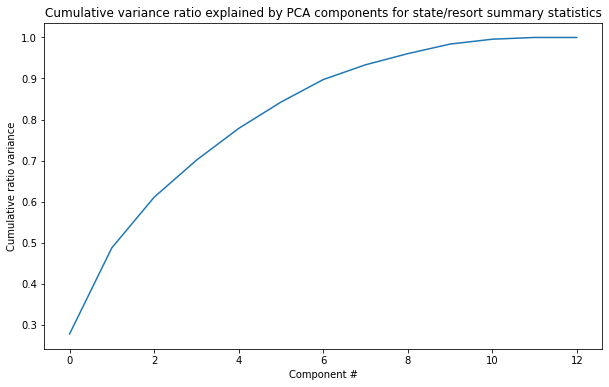

In [12]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(recipe_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

**Note:** It is important to move quickly when performing exploratory data analysis. You should not spend hours trying to create publication-ready figures. However, it is crucially important that you can easily review and summarise the findings from EDA. Descriptive axis labels and titles are _extremely_ useful here. When you come to reread your notebook to summarise your findings, you will be thankful that you created descriptive plots and even made key observations in adjacent markdown cells.

Apply the transformation to the data to obtain the derived features.

In [13]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
recipe_pca_x = recipe_pca.transform(recipe_data_scale)

In [14]:
recipe_pca_x.shape

(70, 13)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

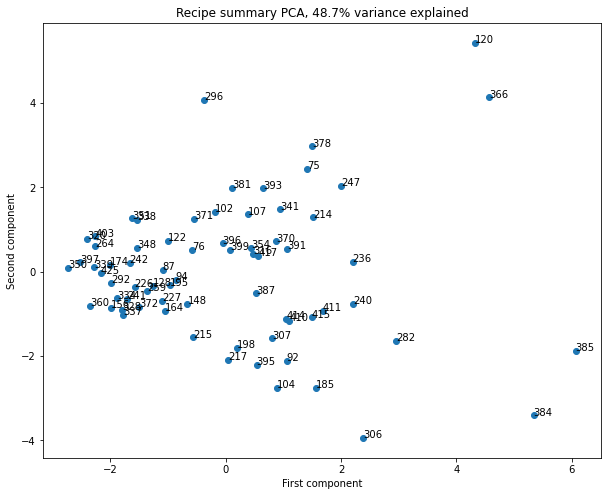

In [15]:
x = recipe_pca_x[:, 0]
y = recipe_pca_x[:, 1]
recipe = recipe_data_index
pc_var = 100 * recipe_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Recipe summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(recipe, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in ticket prices. You know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [16]:
#Code task 8#
#Calculate the average 'AdultWeekend' ticket price by state
recipe_avg_eff = batch_data.groupby('rcp_id')['clar_eff'].mean()
recipe_avg_eff.head()

rcp_id
75    84.580859
76    93.025291
78    94.587480
87    89.347707
89    97.821936
Name: clar_eff, dtype: float64

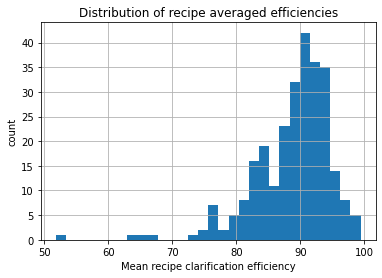

In [17]:
recipe_avg_eff.hist(bins=30)
plt.title('Distribution of recipe averaged efficiencies')
plt.xlabel('Mean recipe clarification efficiency')
plt.ylabel('count');

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [18]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': recipe_pca_x[:, 0], 'PC2':recipe_pca_x[:, 1]}, index=recipe_data_index)
pca_df.head()

,PC1,PC2
rcp_id,,
75,1.419037,2.445687
76,-0.580006,0.518346
87,-1.086773,0.052005
92,1.058434,-2.112132
94,-0.866597,-0.195564


That worked, and you have state as an index.

In [19]:
# our average state prices also have state as an index
recipe_avg_eff.head()

rcp_id
75    84.580859
76    93.025291
78    94.587480
87    89.347707
89    97.821936
Name: clar_eff, dtype: float64

In [20]:
# we can also cast it to a dataframe using Series' to_frame() method:
recipe_avg_eff.to_frame().head()

,clar_eff
rcp_id,
75,84.580859
76,93.025291
78,94.587480
87,89.347707
89,97.821936


Now you can concatenate both parts on axis 1 and using the indexes.

In [21]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, recipe_avg_eff], axis=1)
pca_df.head()

,PC1,PC2,clar_eff
rcp_id,,,
75,1.419037,2.445687,84.580859
76,-0.580006,0.518346,93.025291
78,NaN,NaN,94.587480
87,-1.086773,0.052005,89.347707
89,NaN,NaN,97.821936


You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [22]:
pca_df['Quartile'] = pd.qcut(pca_df.clar_eff, q=4, precision=1)
pca_df.head()

,PC1,PC2,clar_eff,Quartile
rcp_id,,,,
75,1.419037,2.445687,84.580859,"(51.699999999999996, 85.9]"
76,-0.580006,0.518346,93.025291,"(92.8, 99.4]"
78,NaN,NaN,94.587480,"(92.8, 99.4]"
87,-1.086773,0.052005,89.347707,"(85.9, 90.0]"
89,NaN,NaN,97.821936,"(92.8, 99.4]"


In [23]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1          float64
PC2          float64
clar_eff     float64
Quartile    category
dtype: object

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [24]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,clar_eff,Quartile
rcp_id,,,,
78,NaN,NaN,94.587480,"(92.8, 99.4]"
89,NaN,NaN,97.821936,"(92.8, 99.4]"
93,NaN,NaN,83.573747,"(51.699999999999996, 85.9]"
101,NaN,NaN,92.793682,"(90.0, 92.8]"
111,NaN,NaN,95.111111,"(92.8, 99.4]"
...,...,...,...,...
422,NaN,NaN,90.476189,"(90.0, 92.8]"
423,NaN,NaN,94.936709,"(92.8, 99.4]"
424,NaN,NaN,91.772152,"(90.0, 92.8]"


Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [25]:
#pca_df['clar_eff'].fillna(pca_df.clar_eff.mean(), inplace=True)
#pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
#ca_df['Quartile'].fillna('NA', inplace=True)
#pca_df.loc['rcp_id']
pca_df = pca_df.dropna()
pca_df

,PC1,PC2,clar_eff,Quartile
rcp_id,,,,
75,1.419037,2.445687,84.580859,"(51.699999999999996, 85.9]"
76,-0.580006,0.518346,93.025291,"(92.8, 99.4]"
87,-1.086773,0.052005,89.347707,"(85.9, 90.0]"
92,1.058434,-2.112132,90.559659,"(90.0, 92.8]"
94,-0.866597,-0.195564,94.153815,"(92.8, 99.4]"
...,...,...,...,...
411,1.683271,-0.933784,91.656238,"(90.0, 92.8]"
414,1.053009,-1.123066,92.735651,"(90.0, 92.8]"
415,1.496895,-1.079253,94.539097,"(92.8, 99.4]"


Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

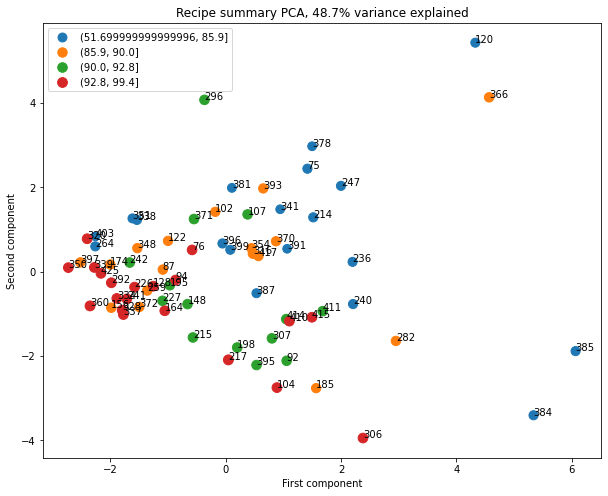

In [26]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.clar_eff
quartiles = pca_df.Quartile
recipe = pca_df.index
pc_var = 100 * recipe_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Recipe summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(recipe, x, y):
    plt.annotate(s, (x, y))

Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not seeing a pattern with price.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish between weekend and weekday ticket prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

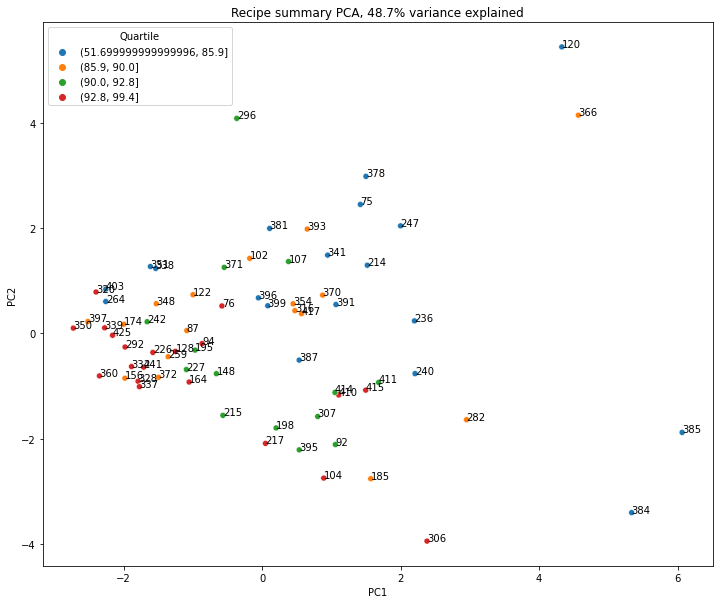

In [27]:
#Code task 11#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Recipe summary PCA, {pc_var:.1f}% variance explained');

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the state summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if you were curious, could you get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [28]:
pd.DataFrame(recipe_pca.components_, columns=recipe_data_columns)

ValueError: Shape of passed values is (13, 13), indices imply (13, 12)

In [29]:
recipe_data_columns

Index(['base_malt_pct', 'Boil Kettle', 'Whirlpool', 'Fermenter', 'Total Hops',
       'fermenter_temperature', 'cu_low', 'cu_high', 'cu_setpoint',
       'pre_run_dump_volume', 'original_gravity', 'clar_eff'],
      dtype='object')

In [30]:
recipe_pca.components_

array([[ 3.25077048e-02,  1.20326838e-01,  2.30113228e-01,
         2.37118246e-01,  3.57704584e-01,  2.81135149e-01,
         3.51539226e-02,  3.53262062e-01,  3.92343387e-01,
         4.07560442e-01, -3.52334988e-02,  4.33006059e-01,
        -1.83012630e-01],
       [ 3.64053446e-04,  1.97917735e-01,  4.27075537e-01,
         2.03004332e-01,  2.81427030e-01,  4.45353009e-01,
         2.62700149e-02, -3.83668118e-01, -3.64724461e-01,
        -3.30974570e-01, -6.28252841e-02, -7.07865878e-02,
        -2.45492352e-01],
       [ 5.64472611e-01, -2.08035897e-01, -3.15185980e-01,
         3.82938667e-01,  1.39217450e-01, -2.28307082e-01,
        -3.58067397e-01, -1.06789701e-01, -7.71987602e-02,
         1.14775213e-02, -1.62050100e-01,  5.68044487e-03,
        -3.85488916e-01],
       [ 2.45726541e-02,  3.17137399e-01, -2.10397164e-01,
         1.64351841e-01,  2.01835742e-02, -1.71451471e-01,
         3.60932222e-01, -9.76792214e-02, -3.96172680e-03,
         4.86690271e-02,  7.46519005e

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

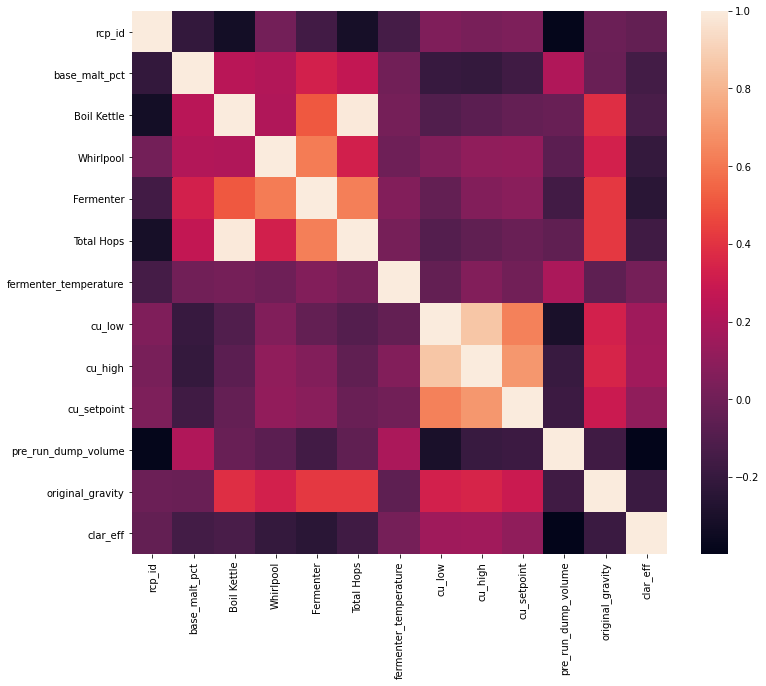

In [36]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(batch_data.corr());

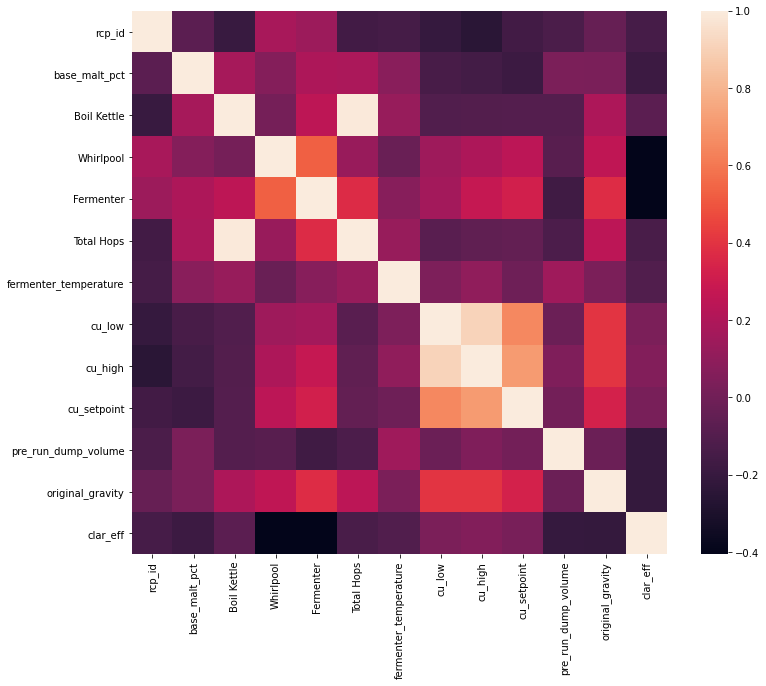

In [35]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(recipe_data.corr());

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [40]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(dataset, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'clar_eff', data=dataset, alpha=0.5)
        ax.set(xlabel=col, ylabel='Clarification Efficiency')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [38]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [feature for feature in batch_data.columns if feature not in ['rcp_id', 'clar_eff']]

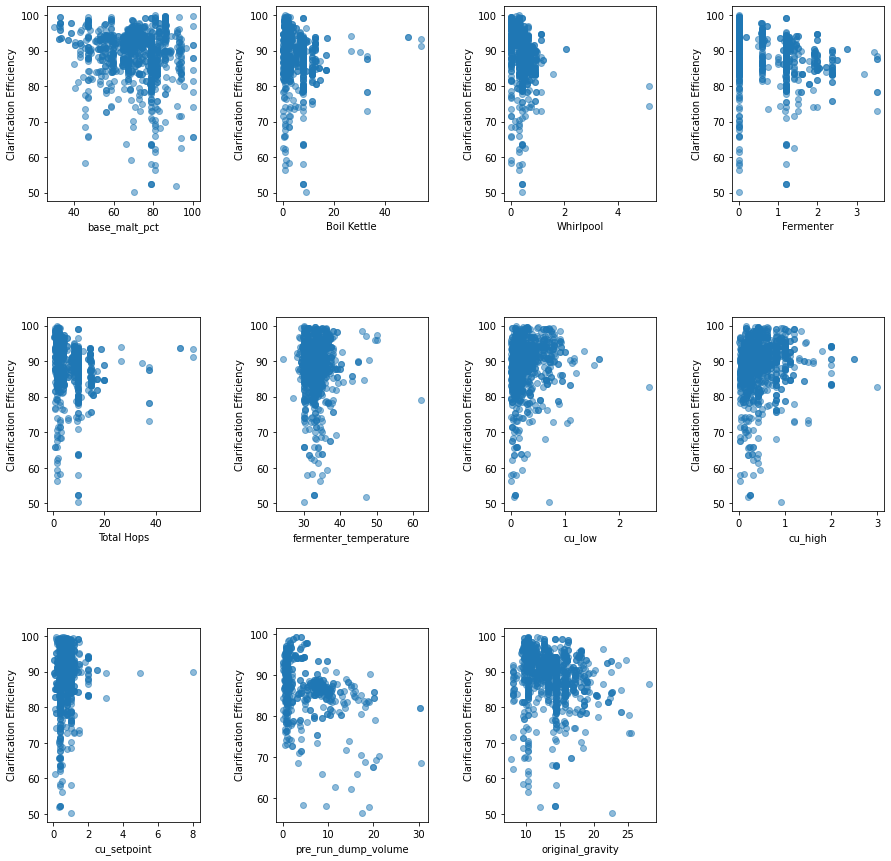

In [41]:
scatterplots(batch_data, features, ncol=4, figsize=(15, 15))

In [42]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [feature for feature in recipe_data.columns if feature not in ['clar_eff']]

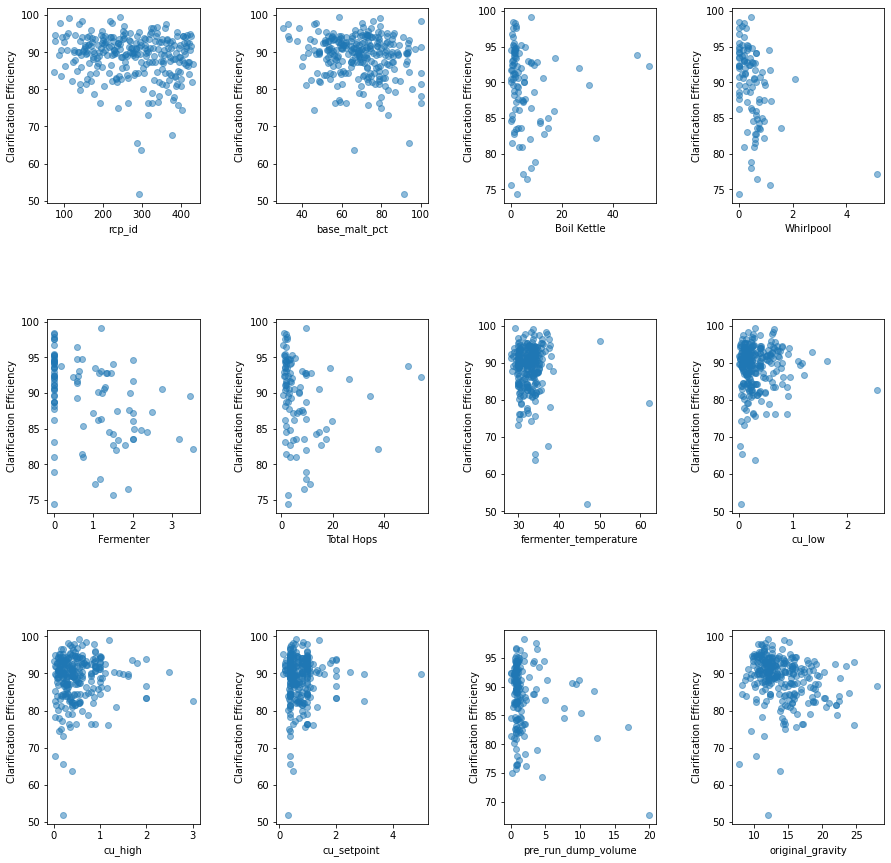

In [43]:
scatterplots(recipe_data, features, ncol=4, figsize=(15, 15))

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** In this data, categorical features included things such as region and state, whereas numerical features included parameters such as summit elevation, number of runs, and night skiing acreage. State did not suggest a relationship with ticket price, so some feature engineering was conducted and a correlation heatmap was produced. Some features added for investigation included:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

One aspect to be wary of with relationaship between features are confounding variables from multicollinearity - while something may be correlated with ticket price, it may not be an actual driver of ticket price. Further, while state does not seem to heavily contribute to ticket price, we should still remain wary of ignoring it for modeling.